In [1]:
import numpy as np
import tensorflow as tf

# Sólo informe sobre errores
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
corpus_raw = 'He is the king . The king is royal . She is the royal  queen '

# convert to lower case
corpus_raw = corpus_raw.lower()

In [3]:
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

In [4]:
unique_words=['he', 'the', 'she', 'king', 'queen', 'royal', 'is'] # words=set(words)
word2int = {}
int2word = {}
vocab_size = len(unique_words) # gives the total number of unique words
for i,word in enumerate(unique_words):
    word2int[word] = i
    int2word[i] = word

In [5]:
print(word2int['queen'])

4


In [6]:
print(int2word[4])

queen


In [7]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [8]:
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [9]:
data = []
WINDOW_SIZE = 2
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [10]:
print(data)

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


In [11]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [12]:
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [13]:
print(x_train)

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]


In [14]:
print(x_train.shape, y_train.shape)

(34, 7) (34, 7)


In [15]:
tf.set_random_seed(1234567)

In [16]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [17]:
EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [18]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [19]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for i in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    if i%1000==0:
        print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  4.7867684
loss is :  1.3295707
loss is :  1.323726
loss is :  1.3223268
loss is :  1.3217282
loss is :  1.3214027
loss is :  1.3212001
loss is :  1.3210629
loss is :  1.3209642
loss is :  1.32089


In [20]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[ 4.9350005e-01 -2.9161644e-01  5.4734558e-01  2.1402080e+00
  -5.8095735e-01]
 [ 3.7450221e-01  7.6808488e-01  1.8853203e+00 -1.3790158e+00
   1.9629668e-02]
 [ 5.5060935e-01  3.2977577e-02 -7.3554061e-02  2.3815403e+00
  -1.7751952e+00]
 [ 6.4877892e-01 -1.3077191e+00  1.7724770e+00  1.6218843e+00
   1.3255827e+00]
 [-5.2866977e-02 -2.1954162e+00 -2.2563904e-03  4.9293742e-01
   1.3110733e+00]
 [ 2.1140649e+00  3.6594623e-01 -2.1624017e-01  7.4250340e-01
  -1.2149994e+00]
 [-6.0443330e-01 -5.0912827e-02 -1.3596379e+00 -4.0226865e-01
   1.9367465e+00]]
----------
[ 0.519766    0.45299616 -0.41997477  0.26156208  0.90566784]
----------


In [21]:
vectors = sess.run(W1 + b1)

# if you work it out, you will see that it has the same effect as running the node hidden representation
print(vectors)


[[ 1.0132661   0.16137972  0.1273708   2.40177     0.3247105 ]
 [ 0.89426816  1.221081    1.4653455  -1.1174537   0.9252975 ]
 [ 1.0703753   0.48597375 -0.49352884  2.6431024  -0.8695274 ]
 [ 1.1685449  -0.854723    1.3525022   1.8834465   2.2312505 ]
 [ 0.466899   -1.7424201  -0.42223117  0.7544995   2.216741  ]
 [ 2.633831    0.8189424  -0.636215    1.0040655  -0.3093316 ]
 [-0.08466733  0.40208334 -1.7796127  -0.14070657  2.8424144 ]]


In [22]:
print(vectors[ word2int['queen'] ])
# say here word2int['queen'] is 2

[ 0.466899   -1.7424201  -0.42223117  0.7544995   2.216741  ]


In [23]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

In [24]:
def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [25]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

queen
king
she


In [26]:
def cos_sim(vec1, vec2):
    """Takes 2 vectors a, b and returns the cosine similarity according 
    to the definition of the dot product
    """
    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)
    return dot_product / (norm_a * norm_b)

In [27]:
def find_closest(word_index, vectors):
    max_dist = -1 # to act like positive infinity
    max_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if cos_sim(vector, query_vector) > max_dist and not np.array_equal(vector, query_vector):
            max_dist = cos_sim(vector, query_vector)
            max_index = index
    return max_index

In [28]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

queen
king
she


In [29]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [30]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

he 0.9991169 0.042017374
is 0.00024354966 -0.99999994
the 0.7357115 -0.67729497
king -0.5410816 0.8409701
the 0.7357115 -0.67729497
king -0.5410816 0.8409701
is 0.00024354966 -0.99999994
royal -0.8735178 -0.48679233
she 0.88298255 -0.4694059
is 0.00024354966 -0.99999994
the 0.7357115 -0.67729497
royal -0.8735178 -0.48679233
queen 0.60694957 0.7947404


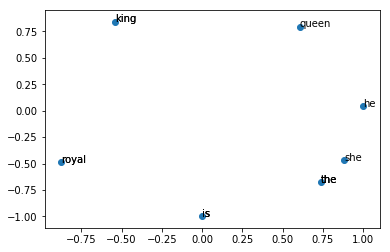

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(vectors[:,0],vectors[:,1])
for word in words:
    print(word, vectors[word2int[word]][0], vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()

In [1]:
from gensim.models import KeyedVectors

In [2]:
filename = 'vectors.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)
result = model.most_similar(positive=['rome', 'france'], negative=['paris'], topn=1)
print(result)

[('queen', 0.6185790300369263)]
[('italy', 0.5761076211929321)]
